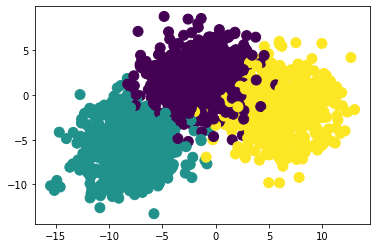

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       0.99      0.98      0.99       186
           2       0.99      1.00      1.00       202

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



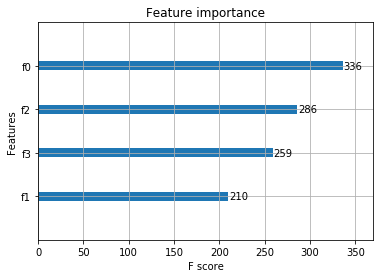

In [1]:
"""
XGBoost model
> pip install xgboost
"""

from xgboost import XGBClassifier, XGBRFRegressor # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.datasets import make_blobs # 클러스터 데이터셋 형성
from sklearn.model_selection import train_test_split # split
from sklearn.metrics import accuracy_score, classification_report # 평가
import matplotlib.pyplot as plt # 데이터셋 시각화

# 1. dataset load
X,y = make_blobs(n_samples=2000, n_features=4, centers=3, cluster_std=2.5)
'''
n_samples : 데이터셋 크기
n_features : x변수
centers : y변수 범주
cluster_std : 클러스터 표준편차 (클수록 오분류 커짐)
'''
X.shape # (2000, 4)
y.shape # (2000,)
y # [0, 1, 0, ..., 1, 1, 2]

plt.scatter(x=X[:,0], y=X[:,1], s=100, c=y, marker='o')
plt.show()

# 2. train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


# 3. model 생성 
xgb = XGBClassifier()
model = xgb.fit(x_train, y_train)
model 
# objective='binary:logistic' -> 이항분류 
# objective='multi:softprob' -> 다항분류  
# n_estimators=100 : tree 수 
# max_depth=6 
# learning_rate=0.300000012

# 4. model 평가 
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
acc # 0.9666666666666667

report = classification_report(y_test, y_pred)
print(report)


# 5. 중요변수 시각화 
fscore = model.get_booster().get_fscore()
fscore # {'f3': 90, 'f0': 113, 'f2': 24, 'f1': 1}

plot_importance(model)
plt.show()
